In [1]:
import numpy as np
from keras.datasets import mnist
# from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation , Dropout
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_validation, y_train, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state= True)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print('size', X_train.size)
print('shape', X_train.shape)
print('dim', X_train.ndim)

size 3920000
shape (5000, 28, 28)
dim 3


In [4]:
X_train.shape[0]

5000

In [5]:
# the data, shuffled and split between train and tests
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 784).astype('float32')


X_train /= 255
X_test /= 255
X_validation /= 255


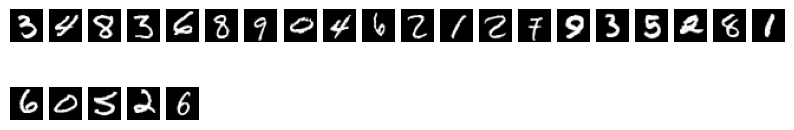

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(10,20,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.axis('off')

plt.show()

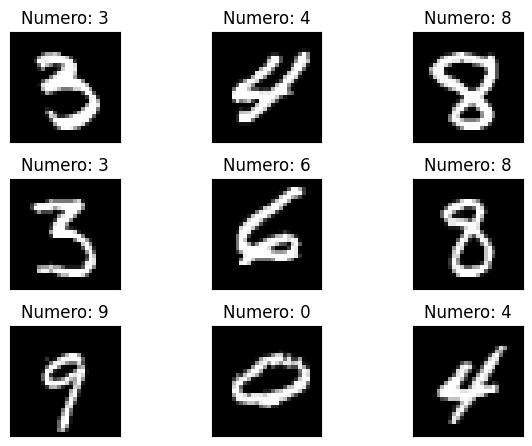

In [7]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Numero: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [8]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)

# Perceptron

In [9]:
learning_rate = 0.5
batch_size = 128
nb_epoch = 100
nb_neurone = 200

model = Sequential()

model.add(Dense(nb_neurone, input_dim = 784))
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, epochs = nb_epoch, batch_size= batch_size, validation_data=(X_validation, y_validation), verbose=1)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5922 - loss: 1.2797 - val_accuracy: 0.5984 - val_loss: 1.5601
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8621 - loss: 0.4885 - val_accuracy: 0.7090 - val_loss: 1.1434
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8877 - loss: 0.3945 - val_accuracy: 0.9092 - val_loss: 0.2808
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9420 - loss: 0.2084 - val_accuracy: 0.5880 - val_loss: 2.1083
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8689 - loss: 0.5815 - val_accuracy: 0.7678 - val_loss: 0.9820
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9420 - loss: 0.2153 - val_accuracy: 0.9338 - val_loss: 0.2158
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9711 - loss: 0.1040 - val_accuracy: 0.8590 - val_loss: 0.5000
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9602 - loss: 0.1273 - val_accuracy: 0.9382 

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.09590508788824081
Test accuracy: 0.9768999814987183


In [11]:
learning_rate = 0.5
batch_size = 128
nb_epoch = 100
nb_neurone = 200

model = Sequential()

model.add(Dense(nb_neurone, input_dim = 784))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, epochs = nb_epoch, batch_size= batch_size, validation_data=(X_validation, y_validation), verbose=1)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5782 - loss: 1.2555 - val_accuracy: 0.6034 - val_loss: 1.1187
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8522 - loss: 0.4750 - val_accuracy: 0.7226 - val_loss: 1.0292
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8866 - loss: 0.3904 - val_accuracy: 0.7704 - val_loss: 0.6871
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9144 - loss: 0.2989 - val_accuracy: 0.5940 - val_loss: 2.1245
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8399 - loss: 0.7344 - val_accuracy: 0.8786 - val_loss: 0.3805
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9361 - loss: 0.2130 - val_accuracy: 0.9342 - val_loss: 0.2138
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9605 - loss: 0.1322 - val_accuracy: 0.9218 - val_loss: 0.2564
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9678 - loss: 0.1091 - val_accuracy: 0.9208 - 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.08985129743814468
Test accuracy: 0.9790999889373779


In [ ]:
learning_rate = 0.5
batch_size = 128
nb_epoch = 100
nb_neurone = 200

model = Sequential()

model.add(Dense(64, input_dim = 784))
model.add(Activation('sigmoid'))
# model.add(Dropout(0.1))

model.add(Dense(128))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('relu'))

sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, epochs = nb_epoch, batch_size= batch_size, validation_data=(X_validation, y_validation), verbose=1)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0927 - loss: 7.7600 - val_accuracy: 0.0954 - val_loss: 7.6105
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0996 - loss: 7.7040 - val_accuracy: 0.0954 - val_loss: 7.5614
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0977 - loss: 7.8644 - val_accuracy: 0.0954 - val_loss: 7.5358
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0903 - loss: 7.8022 - val_accuracy: 0.0954 - val_loss: 7.5197
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0991 - loss: 7.7222 - val_accuracy: 0.0954 - val_loss: 7.5086
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0952 - loss: 7.7602 - val_accuracy: 0.0954 - val_loss: 7.4999
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0961 - loss: 7.6404 - val_accuracy: 0.0954 - val_loss: 7.4934
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0988 - loss: 7.6714 - val_accuracy: 0.0954

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: nan
Test accuracy: 0.09799999743700027


In [ ]:
from sklearn.metrics import cohen_kappa_score
y_pred =  model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)
cohen_kappa_score(y_test, y_pred)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[ 966,    0,    1,    0,    1,    2,    4,    3,    3,    0],
       [   0, 1126,    3,    1,    1,    0,    0,    2,    2,    0],
       [   5,    0,  989,    8,    6,    0,    6,    9,    8,    1],
       [   1,    1,    3,  987,    0,    6,    0,    5,    4,    3],
       [   0,    0,    3,    0,  965,    0,    4,    0,    3,    7],
       [   2,    1,    0,    9,    4,  862,    6,    3,    3,    2],
       [   3,    1,    3,    0,    2,    7,  940,    0,    2,    0],
       [   2,    3,    4,    2,    3,    1,    0, 1001,    2,   10],
       [   3,    3,    3,    9,    3,    5,    6,    3,  935,    4],
       [   2,    2,    0,    2,   10,    0,    1,    7,    2,  983]])

<Axes: >

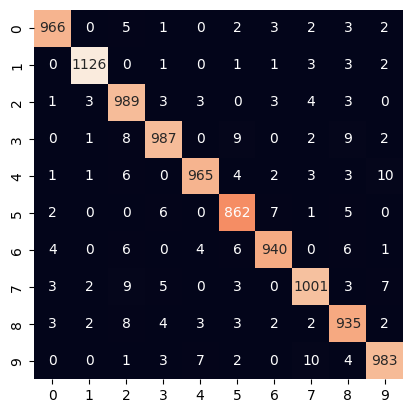

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot=True, fmt='d', cbar=False,
            xticklabels=list(range(10)),
            yticklabels=list(range(10)))

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

learning_rate = 0.7
batch_size = 300
nb_epoch = 400

model = Sequential()

model.add(Dense(200, input_dim = 784))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(learning_rate)

# checkpoint = ModelCheckpoint(filepath='mymodel.hdf5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience = 3, verbose=0, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = nb_epoch, batch_size= batch_size, validation_data=(X_validation, y_validation), verbose=1)


Epoch 1/400
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1286 - loss: 2.3442 - val_accuracy: 0.1974 - val_loss: 2.2385
Epoch 2/400
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1523 - loss: 2.2685 - val_accuracy: 0.2526 - val_loss: 2.1766
Epoch 3/400
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2070 - loss: 2.1988 - val_accuracy: 0.3274 - val_loss: 2.1106
Epoch 4/400
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2379 - loss: 2.1533 - val_accuracy: 0.4092 - val_loss: 2.0385
Epoch 5/400
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2919 - loss: 2.0816 - val_accuracy: 0.4790 - val_loss: 1.9552
Epoch 6/400
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3206 - loss: 2.0224 - val_accuracy: 0.5434 - val_loss: 1.8685
Epoch 7/400
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3767 - loss: 1.9435 - val_accuracy: 0.5916 - val_loss: 1.7768
Epoch 8/400
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4073 - loss: 1.8626 - val_accuracy: 0.